<a href="https://colab.research.google.com/github/Ngabo-bajo/Chatbot_Hackathon/blob/main/Bajo_Ngabonziza_2nd_Hackathon_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEB SCRAPPING

In [ ]:
# importing required libralies for scrapping and creating data frame and json file
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import json
import re

# RURA Website Scrapping

In [ ]:
# Scrapping all div with links in rura website
link = 'https://rura.rw/index.php?id=23'
pageContent = requests.get(link).content
soup = bs(pageContent,'html.parser')
target_div = soup.find_all('div', class_='access-block')

NameError: ignored

In [ ]:
# creating tag list and link list that holds every link associated to tag respectivery
tag_list =[]
link_list = []
for div in target_div:
  links = div.find_all('a')
  
  for link in links:
    if 'index.php?id' in link['href']:
      link_list.append('<a href="http://www.rura.rw/'+f"{link['href']}\" target=\"_blank\">link</a>")
    else:
      link_list.append('<a href='f"\"{link['href']}\" target=\"_blank\">link</a>") 

    try:
     tag_list.append('RURA '+link['title'])
    except KeyError:
      tag_list.append(link.text)

In [ ]:
patterns = '''give me a link of {}.
how to get {}?
how can i find {}?
Where do you get {}?
What is the link to the {}?
How do you get {}?
Guide me to {}?
'''

answers = '''you can use this {} for more info.
Here is the {}.
'''
patterns = patterns.splitlines()
answers = answers.splitlines()

In [ ]:
text = []
for tag in tag_list:
  ques = []
  for question in patterns:
    ques.append(question.format(tag))
  text.append(ques)

In [ ]:
response = []
for link in link_list:
  ans = []
  for answer in answers:
    ans.append(answer.format(link))
  response.append(ans)

In [ ]:
df = pd.DataFrame(columns=['tag','patterns','responses'])
df['tag'] = tag_list
df['patterns'] = text
df['responses'] = response
df.head()

In [ ]:
dictionary = df.to_dict('r')
with open('Rura_data.json','w+') as f:
  json.dump(dictionary,f,indent=4)

# RRA Website Scrapping

In [ ]:
def create_questions():
    patterns = '''what is procedures to {}?
      where do I find {}?
      I want to know about {}?
      what is {}?
      what is link of {}?
      Guide me to {}?
      Where do you get {}?
      What is the link to the {}?
      How do you get {}?
     '''
    patterns_list = patterns.splitlines()
    patterns_list = [w.strip() for w in patterns_list]
    return patterns_list

In [ ]:
def get_info(link):
  page = requests.get(link).text
  soup = bs(page)
  target_divs = soup.find_all('div', class_='feature-boxdom')
  intent_list = ['RRA '+div.a['title'] for div in target_divs if div.a]
  responses_list = [div.p.text.replace('\n',' ').strip()+" by this link "+'<a href="https://www.rra.gov.rw'+f"{div.a['href']}\" target=\"_blank\">Here</a>" for div in target_divs if div.a ]
  text_list = [[w.format(i) for w in create_questions()] for i in intent_list]
  return intent_list, text_list, responses_list

In [ ]:
links = ['https://www.rra.gov.rw/en/domestic-tax-services','https://www.rra.gov.rw/en/customs-services','https://www.rra.gov.rw/en/publications']
intent_list = []
text = []
response_list = []
for link in links:
  (intent,intities,response) = get_info(link)
  intent_list.extend(intent)
  text.extend(intities)
  response_list.extend(response)

In [ ]:
df = pd.DataFrame(columns=['tag','patterns','responses'])
df['tag'] = intent_list
df['patterns'] = text
df['responses'] = response_list
df_dict = df.to_dict('r')
with open('rra_dataset.json', 'w+') as f:
  json.dump(df_dict,f,indent=4)
df.head()

<ipython-input-64-ca8e45232fab>:5: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  df_dict = df.to_dict('r')


,tag,patterns,responses
0,RRA Frequently Asked Questions,[what is procedures to RRA Frequently Asked Qu...,Find a list of frequently asked questions and ...
1,RRA Investors Starter Pack,[what is procedures to RRA Investors Starter P...,All you need to know about investing in Rwanda...
2,RRA Registration and De-registration,[what is procedures to RRA Registration and De...,All you need to know about business registrat...
3,RRA Income Tax,"[what is procedures to RRA Income Tax ?, where...",Here you will find more about Personal Income ...
4,RRA Electronic Billing Machine,[what is procedures to RRA Electronic Billing ...,All you need to know about electronic invoicin...


# RDB Website Scrapping

In [ ]:
bus_registration_url = 'https://brs.rdb.rw/busregonline'
rdbpage = requests.get(bus_registration_url).text
soup = bs(rdbpage)
registration_QA = soup.find_all('div', class_="panel-body")

In [ ]:
# print(registration_QA[0].b.text)#patterns or text from the user
questions = []
for q in registration_QA[:-1]:
    a = q.find_all('b')
    questions.append([i.text for i in a])
print(questions)
questions[-1].append(' Do you have regional or international offices that can facilitate in providing more information?')

[['What is the Rwanda Development Board?', 'What services does the Rwanda Development Board provide?'], ['Who is a foreign investor in Rwanda?', 'Are investors treated the same as local investors in Rwanda?', 'What are some of the investment opportunities available in Rwanda?', 'How long does it take to register my company/ investment business in Rwanda?'], [' What are some of the important documents needed before I can register my business in Rwanda?', 'Domestic Company Registration', 'Opening a branch/ Foreign Company', 'Are there any fees charged to register my business in Rwanda?'], ['How long does it take to obtain a visa in Rwanda? Where do I go to?', 'Can I get land in Rwanda for my project?', 'What is the cost of land in Rwanda?', 'What is the exchange rate of the dollar against your local currency?']]


In [ ]:
textbody = registration_QA[3].text
print(textbody)



How long does it take to obtain a visa in Rwanda? Where do I go to?
                                    It only takes three working days to get a Rwandan Visa for an online application or 
                                    through a Rwandan High Commission or Consular office. A tracking number will be issued which will later on
                                     be used to obtain the visa. Please contact the nearest Rwandan Embassy/ Consular office for further details. 
                                    You may also visit this link for more informationhttp://www.migration.gov.rw
Can I get land in Rwanda for my project?
                                    Yes land can easily be obtained for projects and this is done in two ways;

Privately purchasing land from the private sector

                                            RDB can apply for public sector land on your behalf of the investor for special considerations to cabinet,
                                            should R

In [ ]:
response = ['It only takes three working days to get a Rwandan Visa for an online application or through a Rwandan High Commission or Consular office. A tracking number will be issued which will later on be used to obtain the visa. Please contact the nearest Rwandan Embassy/ Consular office for further details.  You may also visit this link for more informationhttp://www.migration.gov.rw',
            'Yes land can easily be obtained for projects and this is done in two ways; Privately purchasing land from the private sector RDB can apply for public sector land on your behalf of the investor for special considerations to cabinet, should RDB deem the project to be significant business or strategic importance',
            'There is no fixed price for land in Rwanda; this entirely depends on the location and the bargaining power between the buyer and the land owner.',
            'To obtain the latest exchange rates for major currencies against the Rwandan Franc, please visit http://www.bnr.rw for more details.',
            'Yes the Rwanda Development Board has regional and international offices that will help provide information to investors. RDB offices in North America (Canada), China (Shenzhen), and Turkey (Istanbul). Advice and help can also be obtained from the Commercial Attaches, in each Rwandan Embassy/ Consular office abroad. http://www.embassy.gov.rw']

In [ ]:
textbody = registration_QA[3].text
punckpattern = re.compile('[?!.]')
delpattern = re.compile('[\n\s{37}]')
textbody = punckpattern.split(textbody)
textbody = [text.strip() for text in textbody]
textbody = [delpattern.sub(' ',text).strip() for text in textbody]
# responses=findpattern.findall(textbody)
print(textbody)

['How long does it take to obtain a visa in Rwanda', 'Where do I go to', 'It only takes three working days to get a Rwandan Visa for an online application or                                      through a Rwandan High Commission or Consular office', 'A tracking number will be issued which will later on                                      be used to obtain the visa', 'Please contact the nearest Rwandan Embassy/ Consular office for further details', 'You may also visit this link for more informationhttp://www', 'migration', 'gov', 'rw Can I get land in Rwanda for my project', 'Yes land can easily be obtained for projects and this is done in two ways;  Privately purchasing land from the private sector                                               RDB can apply for public sector land on your behalf of the investor for special considerations to cabinet,                                             should RDB deem the project to be significant business or strategic importance                

In [ ]:
textbody = registration_QA[1].text
delpattern = re.compile('\s{37,}')
findpattern = re.compile('\?\s(.+)|\n{2}(.+\n.+\n.+\n.+\n.+\n.+)')
textbody = delpattern.sub(' ',textbody)

responses=findpattern.findall(textbody)
print(responses)

[('A foreign investor in Rwanda (referring to the Investment Code) is any legal entity investing a minimum startup capital of $250.000USD for overseas citizens and $100,000 for locals and members from the East African Community and COMESA states. This enables the investor to apply for an investment certificate', ''), ('Yes, overseas investors are offered the same opportunities and services. Overseas investors are particularly welcomed to participate in the continued growth of the Rwandan economy.', ''), ('Rwanda has a wide range of investment opportunities to offer to investors. Our major focus has majorly relied on key priority sectors of investment that include; infrastructure, agriculture, energy, tourism, business services, ICT, real estate and construction, Financial Services, Mining, Education, Health and General Manufacturing. To find out more, please contact us by telephone or by email on\xa0info@rdb.rw\xa0and we will be delighted to respond quickly to your enquiry.', ''), ('It

In [ ]:
whole_answer =[]
answers = []
for item in responses:
  
  for i in range(len(item)):
    if item[i]:
      answers.append(item[i])
# answers[1] += ' '+answers[2]
# answers.pop(2)
whole_answer.append(answers)
answers = []
print(whole_answer)

[['A foreign investor in Rwanda (referring to the Investment Code) is any legal entity investing a minimum startup capital of $250.000USD for overseas citizens and $100,000 for locals and members from the East African Community and COMESA states. This enables the investor to apply for an investment certificate', 'Yes, overseas investors are offered the same opportunities and services. Overseas investors are particularly welcomed to participate in the continued growth of the Rwandan economy.', 'Rwanda has a wide range of investment opportunities to offer to investors. Our major focus has majorly relied on key priority sectors of investment that include; infrastructure, agriculture, energy, tourism, business services, ICT, real estate and construction, Financial Services, Mining, Education, Health and General Manufacturing. To find out more, please contact us by telephone or by email on\xa0info@rdb.rw\xa0and we will be delighted to respond quickly to your enquiry.', 'It only takes six (6

In [ ]:
whole_answer.append(response)
ans = whole_answer[0][2]
print(ans)

Rwanda has a wide range of investment opportunities to offer to investors. Our major focus has majorly relied on key priority sectors of investment that include; infrastructure, agriculture, energy, tourism, business services, ICT, real estate and construction, Financial Services, Mining, Education, Health and General Manufacturing. To find out more, please contact us by telephone or by email on info@rdb.rw and we will be delighted to respond quickly to your enquiry.


In [ ]:
# ans = whole_answer[0][2]
# ans
whole_answer[0][1] += ' '+ans
# whole_answer[0].pop(2)

In [ ]:
# whole_answer = whole_answer[:4]
whole_answer

[['A foreign investor in Rwanda (referring to the Investment Code) is any legal entity investing a minimum startup capital of $250.000USD for overseas citizens and $100,000 for locals and members from the East African Community and COMESA states. This enables the investor to apply for an investment certificate',
  'Yes, overseas investors are offered the same opportunities and services. Overseas investors are particularly welcomed to participate in the continued growth of the Rwandan economy. Rwanda has a wide range of investment opportunities to offer to investors. Our major focus has majorly relied on key priority sectors of investment that include; infrastructure, agriculture, energy, tourism, business services, ICT, real estate and construction, Financial Services, Mining, Education, Health and General Manufacturing. To find out more, please contact us by telephone or by email on\xa0info@rdb.rw\xa0and we will be delighted to respond quickly to your enquiry.',
  'Rwanda has a wide r

In [ ]:
Q_A_list = list()
for i in range(len(whole_answer)):
   for j in range(len(questions[i])):
     try:
       Q_A_list.append((questions[i][j],whole_answer[i][j]))
     except IndexError:
        print(questions[i])
        print(f'at index of {i}',len(questions[i]))
        print(whole_answer[i])
        print(f'at index of {i}',len(whole_answer[i]))
        print('#########################################')
    #  print('\n')

In [ ]:
# Q_A_list[12] = [Q_A_list[12],'RDB_internationOffices']
print(Q_A_list)
tags = [tag[1] for index,tag in enumerate(Q_A_list)]

[('What is the Rwanda Development Board?', 'A foreign investor in Rwanda (referring to the Investment Code) is any legal entity investing a minimum startup capital of $250.000USD for overseas citizens and $100,000 for locals and members from the East African Community and COMESA states. This enables the investor to apply for an investment certificate'), ('What services does the Rwanda Development Board provide?', 'Yes, overseas investors are offered the same opportunities and services. Overseas investors are particularly welcomed to participate in the continued growth of the Rwandan economy. Rwanda has a wide range of investment opportunities to offer to investors. Our major focus has majorly relied on key priority sectors of investment that include; infrastructure, agriculture, energy, tourism, business services, ICT, real estate and construction, Financial Services, Mining, Education, Health and General Manufacturing. To find out more, please contact us by telephone or by email on\xa

In [ ]:
intents = {'intents':[]}
# iter = 0

for i,j in enumerate(Q_A_list):
  # for j in range(len(questions[i])):
   dics = dict()
   dics['tag'] = tags[i]
  #  iter +=1
   dics['patterns']= j[0]
   dics['responses'] = j[1]
   intents['intents'].append(dics)
# intents['intents']
with open('RDB_Q&A.json','w+') as f:
  json.dump(intents,f,indent=4)

# Combining all Dataset json into one

In [ ]:
with open('/content/intents.json','r') as file:
 intents = json.load(file)
with open('/content/RDB_Q&A.json','r') as file:
 rdb = json.load(file)
rdb1 = rdb['intents']
with open('/content/rra_dataset.json','r') as file:
 rra = json.load(file)
with open('/content/Rura_data.json','r') as file:
 rura = json.load(file)
json_fileName = [rdb1,rra,rura]
for name in json_fileName:
  intents['intents'].extend(name)
with open('Questions_answers.json','w+') as p:
  json.dump(intents,p,indent=4)

In [ ]:
len(intents['intents'])

68

# Data Preprocessing 

In [ ]:
with open("/content/Questions_answers.json",'r') as Q_A:
  dataset = json.load(Q_A)

In [ ]:
tags = []
responses = []
for intent in dataset['intents']:
  for text in intent['patterns']:
     responses.append(text)
     tags.append(intent['tag'])

In [ ]:
df = pd.DataFrame()
df['label'] = tags
df['text'] = responses
df.head()

,label,text
0,greeting,Hi
1,greeting,Hey
2,greeting,How are you
3,greeting,Is anyone there?
4,greeting,Hello


In [ ]:
out = len(df['label'].unique())
df['label'].value_counts()

RDB_internationOffices             97
RDB_docsRequiredToregister         93
RDB_howLongToregister              76
RDB_exchangeofRwandaCurr/dollar    68
RDB_howLongTogetVisa               67
                                   ..
greeting                            6
thanks                              4
goodbye                             3
funny                               3
service                             3
Name: label, Length: 68, dtype: int64

In [ ]:
# Converting the labels into encodings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
# check class distribution
df['label'].value_counts(normalize = True)

12    0.076801
4     0.073634
11    0.060174
5     0.053840
10    0.053048
        ...   
65    0.004751
67    0.003167
64    0.002375
63    0.002375
66    0.002375
Name: label, Length: 68, dtype: float64

In [ ]:
# In this example we have used all the utterances for training purpose
train_text, train_labels = df['text'], df['label']

# Building a model on top of Transformer (distilbert-base-uncased model)

In [ ]:
# Install Transformers
!pip install transformers==3
# To get model summary
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 754 kB 4.2 MB/s 
     |████████████████████████████████| 880 kB 51.9 MB/s 
     |████████████████████████████████| 3.0 MB 59.2 MB/s 
     |████████████████████████████████| 1.3 MB 69.5 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=ea118822954e5ef53e76ca67a5be5063c5a1cfc63141138a062e4706ca362ec8
  Stored in directory: /root/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremoses
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import re
import torch
import random
import torch.nn as nn
import transformers
import matplotlib.pyplot as plt
# specify GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel
# Load the DistilBert tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# Import the DistilBert pretrained model
bert = DistilBertModel.from_pretrained("distilbert-base-uncased")

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/442 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

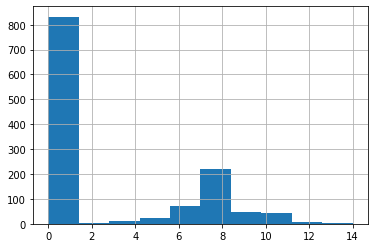

In [ ]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]
pd.Series(seq_len).hist(bins = 10)
# Based on the histogram we are selecting the max len as 12
max_seq_len = 12

In [ ]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer(
    train_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

In [ ]:
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())
train_y

tensor([65, 65, 65,  ..., 62, 62, 62])

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
#define a batch size
batch_size = 16
# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)
# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)
# DataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

In [ ]:
class BERT_Arch(nn.Module):
   def __init__(self, bert):      
       super(BERT_Arch, self).__init__()
       self.bert = bert 
      
       # dropout layer
       self.dropout = nn.Dropout(0.2)
      
       # relu activation function
       self.relu =  nn.ReLU()
       # dense layer
       self.fc1 = nn.Linear(768,512)
       self.fc2 = nn.Linear(512,256)
       self.fc3 = nn.Linear(256,out)
       #softmax activation function
       self.softmax = nn.LogSoftmax(dim=1)
       #define the forward pass
   def forward(self, sent_id, mask):
      #pass the inputs to the model  
      cls_hs = self.bert(sent_id, attention_mask=mask)[0][:,0]
      
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      
      x = self.fc2(x)
      x = self.relu(x)
      x = self.dropout(x)
      # output layer
      x = self.fc3(x)
   
      # apply softmax activation
      x = self.softmax(x)
      return x

In [ ]:
# freeze all the parameters. This will prevent updating of model weights during fine-tuning.
for param in bert.parameters():
      param.requires_grad = False
model = BERT_Arch(bert)
# push the model to GPU
model = model.to(device)
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                  Param #
BERT_Arch                                               --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              (23,440,896)
│    │    └─Embedding: 3-2                              (393,216)
│    │    └─LayerNorm: 3-3                              (1,536)
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             (42,527,232)
├─Dropout: 1-2                                          --
├─ReLU: 1-3                                             --
├─Linear: 1-4                                           393,728
├─Linear: 1-5                                           131,328
├─Linear: 1-6                                           17,476
├─LogSoftmax: 1-7                                       --
Total

In [ ]:
from transformers import AdamW
# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-3)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
#compute the class weights
class_wts = compute_class_weight(
    class_weight = "balanced",
    classes = np.unique(train_labels),
    y = train_labels
    )
print(class_wts)

[0.53067227 0.50198728 0.28141711 0.33167017 0.19971537 0.27314014
 0.30448409 0.51593137 0.30955882 0.46433824 0.27721686 0.24438854
 0.19147968 1.85735294 1.85735294 1.85735294 1.85735294 1.85735294
 1.85735294 1.85735294 1.85735294 1.85735294 1.85735294 1.85735294
 1.85735294 1.85735294 1.85735294 1.85735294 1.85735294 1.85735294
 1.85735294 1.85735294 1.85735294 1.85735294 1.85735294 1.85735294
 1.85735294 1.85735294 1.85735294 1.85735294 1.85735294 1.85735294
 1.85735294 1.85735294 1.85735294 1.85735294 1.85735294 2.65336134
 2.65336134 2.65336134 2.65336134 2.65336134 2.65336134 2.65336134
 2.65336134 2.65336134 2.65336134 2.65336134 2.65336134 2.65336134
 2.65336134 2.65336134 2.65336134 6.19117647 6.19117647 3.09558824
 6.19117647 4.64338235]


In [ ]:
# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)
# loss function
cross_entropy = nn.NLLLoss(weight=weights)

In [ ]:
# empty lists to store training and validation loss of each epoch
train_losses=[]
# number of training epochs
epochs = 400
# We can also use learning rate scheduler to achieve better results
lr_sch = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

In [ ]:
# function to train the model
def train():
  
  model.train()
  total_loss = 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step,len(train_dataloader)))
    # push the batch to gpu
    batch = [r.to(device) for r in batch] 
    sent_id, mask, labels = batch
    # get model predictions for the current batch
    preds = model(sent_id, mask)
    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)
    # add on to the total loss
    total_loss = total_loss + loss.item()
    # backward pass to calculate the gradients
    loss.backward()
    # clip the the gradients to 1.0. It helps in preventing the    exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    # update parameters
    optimizer.step()
    # clear calculated gradients
    optimizer.zero_grad()
  
    # We are not using learning rate scheduler as of now
    # lr_sch.step()
    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()
    # append the model predictions
    total_preds.append(preds)
# compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
# predictions are in the form of (no. of batches, size of batch, no. of classes).
# reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)
#returns the loss and predictions
  return avg_loss, total_preds

In [ ]:
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    # append training and validation loss
    train_losses.append(train_loss)
    # it can make your experiment reproducible, similar to set  random seed to all options where there needs a random seed.
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    print(f'\nTraining Loss: {train_loss:.3f}')


 Epoch 1 / 400
  Batch    50  of     79.

Training Loss: 4.175

 Epoch 2 / 400
  Batch    50  of     79.

Training Loss: 3.874

 Epoch 3 / 400
  Batch    50  of     79.

Training Loss: 3.768

 Epoch 4 / 400
  Batch    50  of     79.

Training Loss: 3.643

 Epoch 5 / 400
  Batch    50  of     79.

Training Loss: 3.381

 Epoch 6 / 400
  Batch    50  of     79.

Training Loss: 3.045

 Epoch 7 / 400
  Batch    50  of     79.

Training Loss: 2.793

 Epoch 8 / 400
  Batch    50  of     79.

Training Loss: 2.549

 Epoch 9 / 400
  Batch    50  of     79.

Training Loss: 2.406

 Epoch 10 / 400
  Batch    50  of     79.

Training Loss: 2.220

 Epoch 11 / 400
  Batch    50  of     79.

Training Loss: 2.054

 Epoch 12 / 400
  Batch    50  of     79.

Training Loss: 1.953

 Epoch 13 / 400
  Batch    50  of     79.

Training Loss: 1.870

 Epoch 14 / 400
  Batch    50  of     79.

Training Loss: 1.733

 Epoch 15 / 400
  Batch    50  of     79.

Training Loss: 1.615

 Epoch 16 / 400
  Batch    50  of

In [ ]:
def get_prediction(str):
 str = re.sub(r'[^a-zA-Z ]+', '', str)
 test_text = [str]
 model.eval()
 
 tokens_test_data = tokenizer(
 test_text,
 max_length = max_seq_len,
 pad_to_max_length=True,
 truncation=True,
 return_token_type_ids=False
 )
 test_seq = torch.tensor(tokens_test_data['input_ids'])
 test_mask = torch.tensor(tokens_test_data['attention_mask'])
 
 preds = None
 with torch.no_grad():
   preds = model(test_seq.to(device), test_mask.to(device))
 preds = preds.detach().cpu().numpy()
 preds = np.argmax(preds, axis = 1)
#  print("Intent Identified: ", le.inverse_transform(preds)[0])
 return le.inverse_transform(preds)[0]
def get_response(message): 
  intent = get_prediction(message)
  for i in dataset['intents']: 
    if i["tag"] == intent:
      if type(i["responses"]) == type(list()): 
        result = random.choice(i["responses"])
      else:
        result = i['responses']
      break
  # print(f"Response : {result}")
  return  result

# Creating a Translator, Frontend and Rest API

In [ ]:
!pip install -U detectlanguage flask flask_ngrok pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 101 kB 3.3 MB/s 
     |████████████████████████████████| 761 kB 21.5 MB/s 
     |████████████████████████████████| 232 kB 53.0 MB/s 
     |████████████████████████████████| 133 kB 58.6 MB/s 
     |████████████████████████████████| 96 kB 5.6 MB/s 
  Created wheel for detectlanguage: filename=detectlanguage-1.5.0-py3-none-any.whl size=3172 sha256=91016aee2a59415f7a622919041bdbcd14746703b7c96cc150c0df0047804d61
  Stored in directory: /root/.cache/pip/wheels/d6/09/22/66f7b01cb9fbc9c0a77311e1d7e80cd294f0c6ab5a445e0d1a
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=64030ef8421759e9e4ec80dac88113ffa33502a92f00d2f27b0bb9251ff7cf5d
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built detectlanguage pyngrok
  Attempting uninstall: MarkupSafe
    Fo

In [ ]:
import requests
import json


class translator:
    api_url = "https://translate.googleapis.com/translate_a/single"
    client = "?client=gtx&dt=t"
    dt = "&dt=t"

    #fROM English to Kinyarwanda
    def translate(text : str , target_lang : str, source_lang : str):
        sl = f"&sl={source_lang}"
        tl = f"&tl={target_lang}"
        r = requests.get(translator.api_url+ translator.client + translator.dt + sl + tl + "&q=" + text)
        return json.loads(r.text)[0][0][0]

In [ ]:
import detectlanguage
from detectlanguage import simple_detect


# use this link to get api key https://detectlanguage.com/
detectlanguage.configuration.api_key = "cd72dad1c9e6dd05a3b33c60fb5122ab"

def process_question(text : str):

  source_lang = simple_detect(text)
  resp = translator.translate(text=text, target_lang='en', source_lang=source_lang)
  return resp, source_lang

def process_answer(text : str, source_lang):
  resp = translator.translate(text=text, target_lang=source_lang, source_lang='en')
  return resp

# Frontend Design

In [ ]:
# creating directory of templates and static files
%%bash
mkdir templates/
mkdir static/

In [ ]:
#write a file of html
%%writefile templates/base.html
<!DOCTYPE html>
<html lang="en">
  <link rel="stylesheet" href="{{ url_for('static', filename='style.css') }}" />

  <head>
    <meta charset="UTF-8" />
    <title>Chatbot</title>
  </head>
  <body>
    <div class="container">
      <div class="bubbles">
        <span style="--i: 11"></span>
        <span style="--i: 13"></span>
        <span style="--i: 21"></span>
        <span style="--i: 15"></span>
        <span style="--i: 13"></span>
        <span style="--i: 14"></span>
        <span style="--i: 23"></span>
        <span style="--i: 19"></span>
        <span style="--i: 17"></span>
        <span style="--i: 16"></span>
        <span style="--i: 20"></span>
        <span style="--i: 19"></span>
        <span style="--i: 24"></span>
        <span style="--i: 11"></span>
        <span style="--i: 18"></span>
        <span style="--i: 15"></span>
        <span style="--i: 25"></span>
        <span style="--i: 21"></span>
        <span style="--i: 22"></span>
        <span style="--i: 29"></span>
        <span style="--i: 11"></span>
        <span style="--i: 13"></span>
        <span style="--i: 21"></span>
        <span style="--i: 15"></span>
        <span style="--i: 10"></span>
        <span style="--i: 14"></span>
        <span style="--i: 23"></span>
        <span style="--i: 34"></span>
        <span style="--i: 17"></span>
        <span style="--i: 16"></span>
        <span style="--i: 15"></span>
        <span style="--i: 19"></span>
        <span style="--i: 24"></span>
        <span style="--i: 11"></span>
        <span style="--i: 18"></span>
        <span style="--i: 15"></span>
        <span style="--i: 25"></span>
        <span style="--i: 21"></span>
        <span style="--i: 22"></span>
        <span style="--i: 29"></span>
      </div>
      <!-- </div> -->
      <div class="chatbox__description">
        <div class="skewed">
          <div class="text">
            <h1>CHATBOT Service</h1>
            <p>
              This is Multi-lingual chatbot designed to help you to get useful
              information and links from RDB, RRA and RURA websites.
            </p>
          </div>
          <div class="image">
            <div>
              <img src="{{ url_for('static', filename='images/bots.webp') }}" />
            </div>
          </div>
        </div>
      </div>
    </div>
    <div class="chatbox">
      <div class="chatbox__support">
        <div class="chatbox__header">
          <div class="chatbox__image--header">
            <img
              src="https://img.icons8.com/fluency/48/null/bot.png"
              alt="image"
            />
            <!-- https://img.icons8.com/color/48/000000/circled-user-female-skin-type-5--v1.png -->
            <!-- https://img.icons8.com/fluency/48/null/bot.png -->
          </div>
          <div class="chatbox__content--header">
            <h4 class="chatbox__heading--header">Chat support</h4>
            <p class="chatbox__description--header">
              Need any help? Please reach out through the chat.
            </p>
          </div>
        </div>
        <div class="chatbox__messages">
          <div></div>
        </div>
        <div class="chatbox__footer">
          <input type="text" placeholder="Write a message..." />
          <button class="chatbox__send--footer send__button">Send</button>
        </div>
      </div>
      <div class="chatbox__button">
        <!-- <button>
              <img
                src="{{ url_for('static', filename='images/chatbox-icon.svg') }}"
              />
            </button> -->
        <button>
          <img
            src="{{ url_for('static', filename='images/icons8-chatbot-32_w.png') }}"
          />
        </button>
      </div>
    </div>
    <!-- </div> -->
    <script>
      $SCRIPT_ROOT = {{ request.script_root|tojson }};
    </script>
    <script
      type="text/javascript"
      src="{{ url_for('static', filename='app.js') }}"
    ></script>
  </body>
</html>


Writing templates/base.html


In [ ]:
# write a file of ccs
%%writefile static/style.css
* {
  box-sizing: border-box;
  margin: 0;
  padding: 0;
}

body {
  font-family: "Nunito", sans-serif;
  font-weight: 400;
  font-size: 100%;
  /* background: #c1df6d; */
  background: #0c192c;
}
/* background style */
.container {
  position: relative;
  width: 100%;
  height: 100vh;
  overflow: hidden;
}

.bubbles {
  position: relative;
  display: flex;
}

.bubbles span {
  position: relative;
  width: 30px;
  height: 30px;
  background: #4fc3dc;
  margin: 0 4px;
  border-radius: 50%;
  box-shadow: 0 0 0 10px #4fc3dc44, 0 0 50px #4fc3dc, 0 0 100px #4fc3dc;
  animation: animate 15s linear infinite;
  animation-duration: calc(125s / var(--i));
}
.bubbles span:nth-child(even) {
  background: #0a1e77e0;
  box-shadow: 0 0 0 10px #3245bf, 0 0 50px #9a5bff, 0 0 100px #e67bf7;
  animation: animate 15s linear infinite;
}
@keyframes animate {
  0% {
    transform: translateY(100vh) scale(0);
  }
  100% {
    transform: translateY(-10vh) scale(1);
  }
}

/* end style */
/* chatbox description */
.chatbox__description {
  position: absolute;
  float: left;
  display: flex;
  justify-content: center;
  margin-left: 10px;
  margin-right: 5px;
  min-height: 100vh;
  align-items: center;
  flex-direction: column;
  /* width: 50%; */
}
.chatbox__description .skewed .text .p {
  font-size: 0.9em;
  line-height: 23px;
  color: #8f8f8f;
}
h1 {
  margin: 0;
}

.skewed {
  width: 45em;
  color: #f1f1f1;
  display: flex;
  /* background: #111; */
  background: #051e53;
  margin: 2em 0;
  box-shadow: 0 0 15px rgba(0, 0, 0, 0.7);
}

.chatbox__description .skewed .text {
  padding: 1.5em;
  width: 50%;
  display: flex;
  justify-content: space-evenly;
  align-items: flex-start;
  flex-direction: column;
  /* margin-left: 10px; */
}

.chatbox__description .skewed .image {
  /* width: 50%; */
  height: 17em;
  position: relative;
  overflow: hidden;
  width: 80%;
}

.chatbox__description .skewed .image::before {
  content: "";
  position: absolute;
  left: -5.1em;
  top: 50%;
  transform: translateY(-50%) rotate(20deg);
  /* background: #111; */
  background: #051e53f8;
  width: 40%;
  height: 140%;
  box-shadow: 0 0 20px rgba(0, 0, 0, 0.7);
}

/* end style */
*,
html {
  --primaryGradient: linear-gradient(93.12deg, #112955.52%, #104bcc 100%);
  --secondaryGradient: linear-gradient(268.91deg, #-2.14%, #104bcc 99.69%);
  --primaryBoxShadow: 0px 10px 15px rgba(36, 2, 2, 0.205);
  --secondaryBoxShadow: 0px -10px 15px rgba(54, 104, 14, 0.13);
  --primary: #0b3eac;
}

/* CHATBOX
=============== */
.chatbox {
  position: absolute;
  bottom: 30px;
  right: 30px;
}

/* CONTENT IS CLOSE */
.chatbox__support {
  display: flex;
  flex-direction: column;
  background: rgba(238, 238, 238, 0.61);
  width: 300px;
  height: 350px;
  z-index: -123456;
  opacity: 0;
  transition: all 0.5s ease-in-out;
}

/* CONTENT ISOPEN */
.chatbox--active {
  transform: translateY(-40px);
  z-index: 123456;
  opacity: 1;
}

/* BUTTON */
.chatbox__button {
  /* position: relative; */
  text-align: right;
}

.send__button {
  padding: 6px;
  background: transparent;
  border: none;
  outline: none;
  cursor: pointer;
}

/* HEADER */
.chatbox__header {
  position: sticky;
  top: 0;
  background: orange;
  border-bottom-right-radius: 20px;
  border-bottom-left-radius: 20px;
}

/* MESSAGES */
.chatbox__messages {
  margin-top: auto;
  display: flex;
  overflow-y: scroll;
  flex-direction: column-reverse;
}

.messages__item {
  background: orange;
  max-width: 60.6%;
  width: fit-content;
}

.messages__item--operator {
  margin-left: auto;
}

.messages__item--visitor {
  margin-right: auto;
}

/* FOOTER */
.chatbox__footer {
  position: sticky;
  bottom: 0;
}

.chatbox__support {
  background: #8696e0f5;
  height: 450px;
  width: 350px;
  box-shadow: 0px 0px 15px rgba(12, 124, 119, 0.726);
  border-top-left-radius: 20px;
  border-top-right-radius: 20px;
  border-bottom-left-radius: 20px;
  border-bottom-right-radius: 20px;
}

/* HEADER */
.chatbox__header {
  background: var(--primaryGradient);
  display: flex;
  flex-direction: row;
  align-items: center;
  justify-content: center;
  padding: 15px 20px;
  border-top-left-radius: 20px;
  border-top-right-radius: 20px;
  box-shadow: var(--primaryBoxShadow);
}

.chatbox__image--header {
  margin-right: 10px;
}

.chatbox__heading--header {
  font-size: 1.2rem;
  color: white;
}

.chatbox__description--header {
  font-size: 0.9rem;
  color: white;
}

/* Messages */
.chatbox__messages {
  padding: 0 20px;
}

.messages__item {
  margin-top: 10px;
  background: #e0e0e0;
  padding: 8px 12px;
  word-wrap: break-word;
  max-width: 70%;
  height: auto;
}

.messages__item--visitor,
.messages__item--typing {
  border-top-left-radius: 20px;
  border-top-right-radius: 20px;
  border-bottom-right-radius: 20px;
}

.messages__item--operator {
  border-top-left-radius: 20px;
  border-top-right-radius: 20px;
  border-bottom-left-radius: 20px;
  background: var(--primary);
  color: white;
}

/* FOOTER */
.chatbox__footer {
  display: flex;
  flex-direction: row;
  align-items: center;
  justify-content: space-between;
  padding: 20px 20px;
  background: var(--secondaryGradient);
  box-shadow: var(--secondaryBoxShadow);

  margin-top: 20px;
}

.chatbox__footer input {
  width: 80%;
  border: none;
  padding: 10px 10px;
  border-radius: 30px;
  text-align: left;
}

.chatbox__send--footer {
  color: rgb(236, 239, 243);
}

.chatbox__button button,
.chatbox__button button:focus,
.chatbox__button button:visited {
  width: 50px;
  height: 50px;
  padding: 10px;
  /* background: white; */
  background: #0b3eac;
  border: none;
  outline: none;
  border-top-left-radius: 50px;
  border-top-right-radius: 50px;
  border-bottom-left-radius: 50px;
  box-shadow: 0px 10px 15px rgba(11, 75, 170, 0.158);
  cursor: pointer;
}


Writing static/style.css


In [ ]:
#write a file of javascript
%%writefile static/app.js
class Chatbox {
    constructor() {
        this.args = {
            openButton: document.querySelector('.chatbox__button'),
            chatBox: document.querySelector('.chatbox__support'),
            sendButton: document.querySelector('.send__button')
        }

        this.state = false;
        this.messages = [];
    }

    display() {
        const {openButton, chatBox, sendButton} = this.args;

        openButton.addEventListener('click', () => this.toggleState(chatBox))

        sendButton.addEventListener('click', () => this.onSendButton(chatBox))

        const node = chatBox.querySelector('input');
        node.addEventListener("keyup", ({key}) => {
            if (key === "Enter") {
                this.onSendButton(chatBox)
            }
        })
    }

    toggleState(chatbox) {
        this.state = !this.state;

        // show or hides the box
        if(this.state) {
            chatbox.classList.add('chatbox--active')
        } else {
            chatbox.classList.remove('chatbox--active')
        }
    }

    onSendButton(chatbox) {
        var textField = chatbox.querySelector('input');
        let text1 = textField.value
        if (text1 === "") {
            return;
        }

        let msg1 = { name: "User", message: text1 }
        this.messages.push(msg1);

        fetch('http://127.0.0.1:5000/predict', {
            method: 'POST',
            body: JSON.stringify({ message: text1 }),
            mode: 'cors',
            headers: {
              'Content-Type': 'application/json'
            },
          })
          .then(r => r.json())
          .then(r => {
            let msg2 = { name: "chatbot", message: r.answer };
            this.messages.push(msg2);
            this.updateChatText(chatbox)
            textField.value = ''

        }).catch((error) => {
            console.error('Error:', error);
            this.updateChatText(chatbox)
            textField.value = ''
          });
    }

    updateChatText(chatbox) {
        var html = '';
        this.messages.slice().reverse().forEach(function(item, index) {
            if (item.name === "Sam")
            {
                html += '<div class="messages__item messages__item--visitor">' + item.message + '</div>'
            }
            else
            {
                html += '<div class="messages__item messages__item--operator">' + item.message + '</div>'
            }
          });

        const chatmessage = chatbox.querySelector('.chatbox__messages');
        chatmessage.innerHTML = html;
    }
}


const chatbox = new Chatbox();
chatbox.display();

Writing static/app.js


# Flask API and Flask_ngrok

In [ ]:
from flask import *
from flask_ngrok import run_with_ngrok

In [ ]:
!ngrok authtoken 2HJPzPRpYvr89tofbyFHENjaCjW_4awE5aGy6gkeEwsmvrYYE

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
def process(QUESTION: str):
  USER_QUERY, SL = process_question(QUESTION) #Translate the original question into english and store the source lang
  RESPONSE = get_response(USER_QUERY) #Asking th chatbot question
  ORIGINAL_RESPONSE = process_answer(RESPONSE, SL)
  return ORIGINAL_RESPONSE

In [ ]:
app = Flask("chatbot")

# create two routes

@app.get('/')
def index_get():
    return render_template("base.html")

@app.post('/predict')
def predict():
    text = request.get_json().get("message")
    #check if text is valid (I let it for you)
    response = process(text)
    # we jsonify our response
    message = {"answer":response}
    print(message)
    return jsonify(message)

In [ ]:
run_with_ngrok(app)
app.run()

 * Serving Flask app 'chatbot'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://0568-34-80-104-57.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [18/Dec/2022 15:57:16] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [18/Dec/2022 15:57:18] "GET /static/style.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [18/Dec/2022 15:57:18] "GET /static/images/bots.webp HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [18/Dec/2022 15:57:18] "GET /static/images/icons8-chatbot-32_w.png HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [18/Dec/2022 15:57:18] "GET /static/app.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [18/Dec/2022 15:57:19] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [18/Dec/2022 16:01:36] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [18/Dec/2022 16:01:38] "GET /static/style.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [18/Dec/2022 16:01:39] "GET /static/app.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [18/Dec/2022 16:01:39] "GET /static/images/icons8-chatbot-32_w.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [18/Dec/2022 16:01:39] "GET /static/images/bots.webp HTTP/1.1" 200

{'answer': 'Hi there, how can I help?'}


INFO:werkzeug:127.0.0.1 - - [18/Dec/2022 16:10:15] "POST /predict HTTP/1.1" 200 -


{'answer': 'Hey :-)'}


INFO:werkzeug:127.0.0.1 - - [18/Dec/2022 16:12:57] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [18/Dec/2022 16:12:58] "GET /static/style.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [18/Dec/2022 16:12:58] "GET /static/images/bots.webp HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [18/Dec/2022 16:12:59] "GET /static/app.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [18/Dec/2022 16:12:59] "GET /static/images/icons8-chatbot-32_w.png HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [18/Dec/2022 16:13:59] "GET /static/style.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [18/Dec/2022 16:15:07] "POST /predict HTTP/1.1" 200 -


{'answer': 'you can use this <a href="http://www.rura.rw/index.php?id=279">link</a> for more info.'}


INFO:werkzeug:127.0.0.1 - - [18/Dec/2022 16:17:26] "POST /predict HTTP/1.1" 200 -


{'answer': 'All you need to know about investing in Rwanda, and a contact list for immediate assistance. by this link <a href="https://www.rra.gov.rw/en/domestic-tax-services/investors-starter-pack">Here</a>'}
